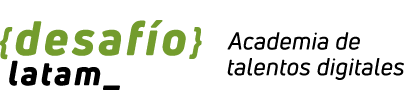

#<center><font color='green'>Random Forest</font></center>

In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import itertools


In [3]:
# Cargar el dataset de Seaborn (usaremos el conjunto Iris como ejemplo)
iris = sns.load_dataset("iris")

# Dividir el dataset en características (X) y etiquetas (y)
X = iris.drop("species", axis=1)
y = iris["species"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=123)

# Definir la cuadrícula de hiperparámetros para buscar
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [5]:
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros óptimos
best_rf_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Generar un informe de clasificación
class_report = classification_report(y_test, y_pred, target_names=iris["species"].unique())

# Mostrar los hiperparámetros óptimos encontrados
print("Hiperparámetros óptimos:")
print(grid_search.best_params_)

Hiperparámetros óptimos:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [6]:
print(class_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



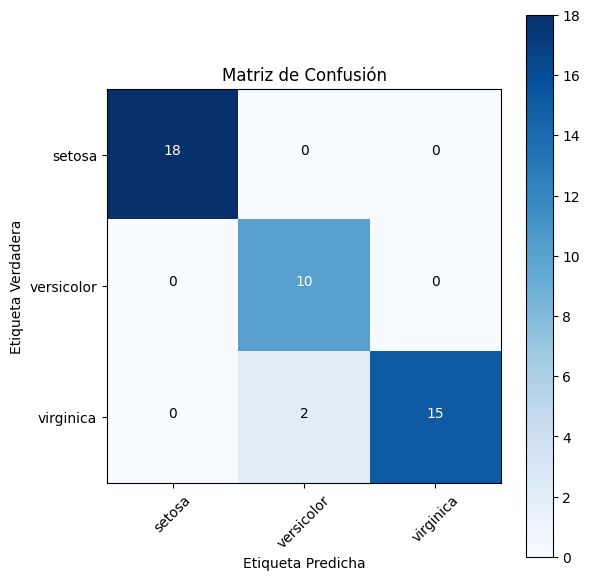

In [7]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Función para mostrar la matriz de confusión
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

# Definir las clases
class_names = iris["species"].unique()

# Mostrar la matriz de confusión
plot_confusion_matrix(cm, classes=class_names)
plt.show()